## Transformada de Fourier
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.fftpack import fft, ifft
import cmath
import warnings
warnings.filterwarnings('ignore', 'Casting complex values to real discards the imaginary part')
plt.style.use('classic')

In [2]:
pi=np.arccos(-1) # Pi
def gaussian(x, mu, sig):
    return (1./(np.sqrt(2.*pi)*sig))*np.exp((1./2)*(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))

### Para cada uno de los datos se calcula su transformada usando la siguiente expresión 

$\hat{f}\left [ \omega  \right ]^{k}=\sum_{m=1}^{n-1}f^{m}(x)e^{-2\pi i\frac{mk}{n}}$

In [3]:
def fourier(y):
    dt=y[1]-y[0]
    j=complex(0,1) # Se define el vector complejo, (0,1)
    m = np.size(y)
    ffty = np.zeros(m)
    ffty2 = np.zeros(m)
    global comp
    comp = 0
    for k in range(m):
        for i in range(m):
            #a = np.exp(-2*pi*j*y[i]*m*dt)
            comp = comp+y[i]*np.exp((-2*pi*j*i*k)/m)
        ffty[k] = comp
    ffty = ffty - max(abs(ffty))/2.
    for i in range(m):
        if (ffty[i]>=0.0):
            ffty2[i]=ffty[i]
    for i in range(m):
        if(i<m-2):
            if(ffty2[i]>0 and ffty2[i+2]>0 and ffty2[i+1]<=0):
                ffty2[i+1]=ffty2[i+2]
        if(i>m/8. and i<(m-m/8)):
            if(ffty2[i]<=1*10**-3 and ffty2[i+1]>=1*10**-3):
                ffty2[i]=ffty2[i+1]
    ffty2[0]=max(abs(ffty2))
    return ffty2

### La función empleada es una gaussiana

$g(x)=\frac{1}{\sqrt{2\pi }\sigma }e^{-\frac{1}{2}\left ( \frac{x-\mu }{\sigma }\right )^{2}}$

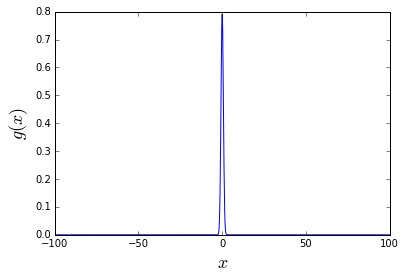

In [4]:
x = np.linspace(-100.,100.,1000)
plt.plot(x,gaussian(x,0.,.5))
plt.xlabel("$x$",fontsize = 18)
plt.ylabel("$g(x)$",fontsize = 18)
plt.show()

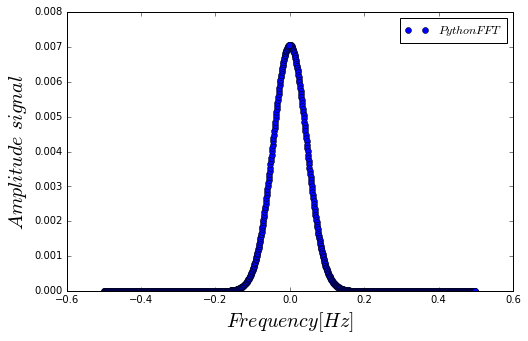

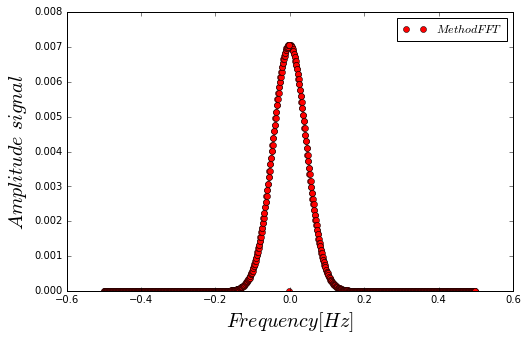

In [5]:
plt.figure(figsize=(8,5))
gfft = fft(gaussian(x,0.,.5))
xf=np.fft.fftfreq(np.size(gfft))
m = np.size(gfft)
plt.plot(xf,abs(gfft)/m, 'bo',label = "$Python FFT$")
plt.xlabel("$Frequency [Hz]$",fontsize = 20)   # Establece el título del eje x
plt.ylabel("$Amplitude$ $signal$",fontsize = 20)   # Establece el título del eje y
plt.legend()
plt.show()
plt.figure(figsize=(8,5))
plt.plot(xf,abs(fourier(gaussian(x,0.,.5)))/(m/2.), 'ro',label = "$Method FFT$")
plt.xlabel("$Frequency [Hz]$",fontsize = 20)   # Establece el título del eje x
plt.ylabel("$Amplitude$ $signal$",fontsize = 20)   # Establece el título del eje y
plt.legend()
plt.show()